<a href="https://colab.research.google.com/github/maxkrakauer/DeepMovieGenrePrediction/blob/main/encoder_movie_genre_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import csv

data = pd.read_csv('/content/drive/MyDrive/FinalProject/movie_plots_by_poster_revised.csv') #,encoding = "ISO-8859-1"
truncat = data[:30000]
truncat.values[0][4]

7.4

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import torch

model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [ ]:
x = truncat.drop(['id','poster','title','year','rating','genre','action','adventure','animation','comedy','crime','drama','fantasy','horror','mystery','romance','sci-fi','short','thriller'], axis = 1)
x = x.to_numpy()

In [ ]:
y = truncat.drop(['id','poster','title','year','rating','genre','plot'], axis = 1)
y = y.to_numpy()

In [ ]:
x_train, x_test = x[:24000,:], x[24000:,:]
y_train, y_test = y[:24000,:], y[24000:,:]

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(13))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 16)                8208      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                221       
Total params: 256,806,253
Trainable params: 256,806,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = x_train[0:5000]
partial_x_train = x_train[5000:24000]

y_val = y_train[0:5000]
partial_y_train = y_train[5000:24000]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
38/38 [==============================] - 33s 696ms/step - loss: 0.5723 - accuracy: 0.7911 - val_loss: 0.4871 - val_accuracy: 0.8254
Epoch 2/20
38/38 [==============================] - 26s 690ms/step - loss: 0.4727 - accuracy: 0.8195 - val_loss: 0.4190 - val_accuracy: 0.8414
Epoch 3/20
38/38 [==============================] - 26s 683ms/step - loss: 0.4266 - accuracy: 0.8238 - val_loss: 0.3885 - val_accuracy: 0.8414
Epoch 4/20
38/38 [==============================] - 26s 692ms/step - loss: 0.3967 - accuracy: 0.8280 - val_loss: 0.3699 - val_accuracy: 0.8448
Epoch 5/20
38/38 [==============================] - 26s 680ms/step - loss: 0.3684 - accuracy: 0.8366 - val_loss: 0.3629 - val_accuracy: 0.8466
Epoch 6/20
38/38 [==============================] - 26s 686ms/step - loss: 0.3392 - accuracy: 0.8497 - val_loss: 0.3563 - val_accuracy: 0.8480
Epoch 7/20
38/38 [==============================] - 27s 698ms/step - loss: 0.3127 - accuracy: 0.8654 - val_loss: 0.3553 - val_accuracy: 0.8509

In [ ]:
results = model.evaluate(x_test, y_test)

print(results)

188/188 [==============================] - 3s 17ms/step - loss: 0.5665 - accuracy: 0.8474
[0.5665088295936584, 0.8473591208457947]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

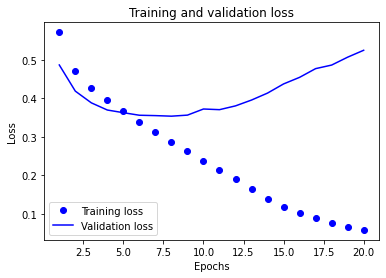

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

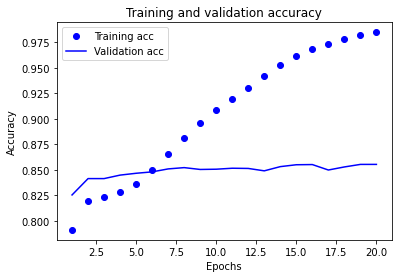

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()